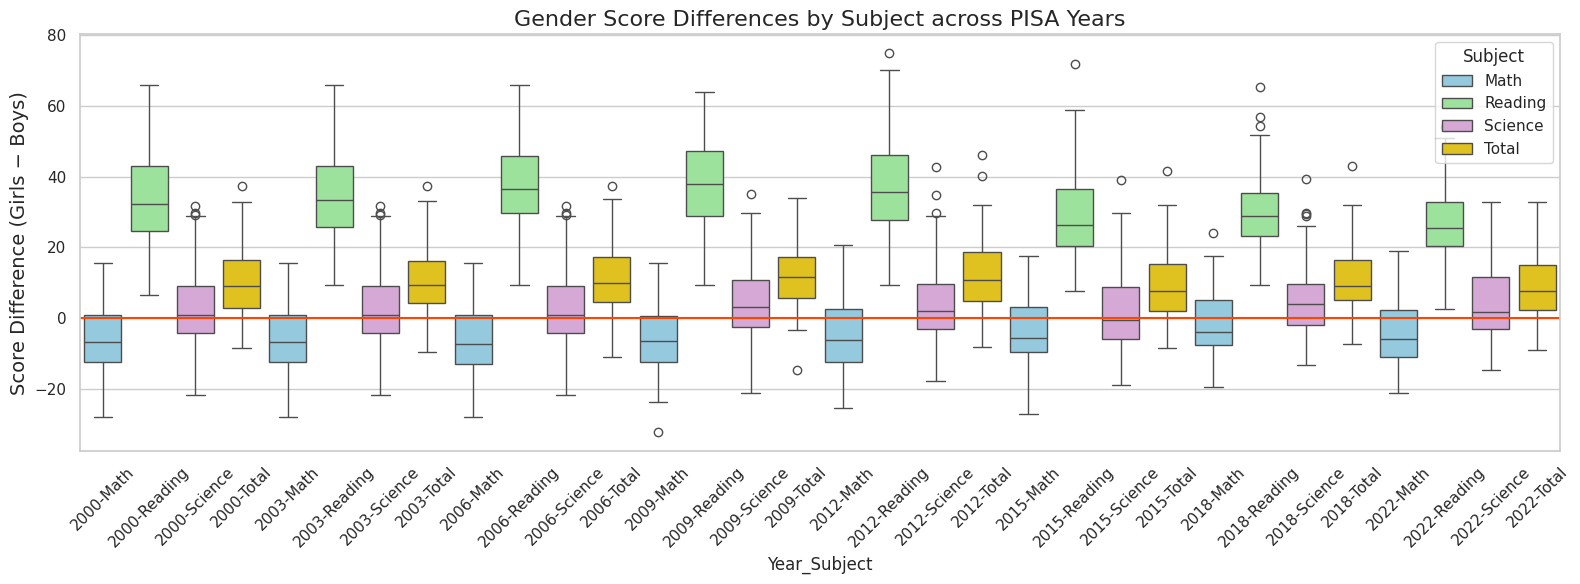

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("complete_data.csv")
pisa_years = [2000, 2003, 2006, 2009, 2012, 2015, 2018, 2022]
df = df[df["Year"].isin(pisa_years)].copy()

# difference calculations
df["diff_total"]   = df["PISA_Girls_Average"] - df["PISA_Boys_Average"]
df["diff_math"]    = df["Math_PISA_Female"]   - df["Math_PISA_Male"]
df["diff_reading"] = df["Read_PISA_Female"]   - df["Read_PISA_Male"]
df["diff_science"] = df["Sci_PISA_Female"]    - df["Sci_PISA_Male"]

subjects     = ["Math", "Reading", "Science", "Total"]
diff_columns = {
    "Math":    "diff_math",
    "Reading": "diff_reading",
    "Science": "diff_science",
    "Total":   "diff_total"
}


rows = [] # [Year_Subject, Subject, Score_Diff]

for i in range(df.shape[0]): # row (country-year)
    year_val = int(df.at[i, "Year"])

    for subject in subjects:  # each of the four subjects
        col_name   = diff_columns[subject]
        score_diff = df.loc[i, col_name]

        year_subject_label = str(year_val) + '-' + subject # year subject label: 2003-Math
        rows.append([year_subject_label, subject, score_diff])

boxplot_df = pd.DataFrame( rows ,columns=["Year_Subject", "Subject", "Score_Diff"])

sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(16, 6))

subject_colors = {
    'Math':    'skyblue',
    'Reading': 'lightgreen',
    'Science': 'plum',
    'Total':   'gold'
}

sns.boxplot(
    data=boxplot_df,
    x="Year_Subject",
    y="Score_Diff",
    hue="Subject",
    palette=subject_colors,
)

# horizontal version of the recit 5 vertical line
ax.axhline(y=0, color='orangered')

# titles and labels
ax.set_title("Gender Score Differences by Subject across PISA Years", fontsize=16)
ax.set_ylabel("Score Difference (Girls − Boys)", fontsize=14)

labels = boxplot_df["Year_Subject"].unique()

tick_list= []
for j in range(len(labels)):
   tick_list.append(j)

plt.xticks(ticks=tick_list, rotation=45)

# to show color codes
ax.legend(title="Subject", loc='upper right')

plt.tight_layout()
plt.show()




*   With this graph, I wanted to see if there are any score differences for reading, science and mathematics scores for boys and girls.
 *  Subject score differences (girls-boys) are plotted for each year PISA score is taken
 * Difference= subject.girls – subject.boys, subject = ‘Science’, ‘Math’, ‘Reading’, ‘Total’

* It seems that girls are on average scoring higher on reading, so I will apply 1-tailed t test to see if this difference is significant.

* Science and Math scores look nearly the same, so I will apply 2-tailed t test to see if there is a difference.



###**Hypothesis Testing**

* Significance level alpha = 0.05 will be used   

**H₀:** Girls mean and boys mean for PISA reading scores are the same.  
**H₁:** Girls mean PISA reading scores are higher than boys.

**H₀:** μ girls − μ boys = 0  
**H₁:** μ girls > μ boys


**Method:** One-tailed independent t-test will be done.

In [ ]:
import pandas as pd
import scipy.stats as stats

df = pd.read_csv("complete_data.csv")
girls_read = df['Read_PISA_Female'].dropna()
boys_read = df['Read_PISA_Male'].dropna()

t_stat, p_one_tailed = stats.ttest_ind(
    girls_read, boys_read,
    equal_var=False,
    alternative='greater'
)

print(f"t = {t_stat:.3f}, one-tailed p = {p_one_tailed:.4f}")

alpha = 0.5

if p_one_tailed < alpha:
    print("P-value is smaller than 0.05, null hypothesis is rejected. \nThere is significant evidence that girls mean PISA reading scores are higher than boys.")
else:
    print("P-value is bigger than 0.05, fail to reject null hypothesis. \nNot enough evidence to say girls and boys average reading scores differ.")



t = 10.623, one-tailed p = 0.0000
P-value is smaller than 0.05, null hypothesis is rejected. 
There is significant evidence that girls mean PISA reading scores are higher than boys.


******************************************
**H₀:** Girls mean and boys mean for PISA math scores are the same.  
**H₁:** Girls mean PISA math scores are different than boys mean.

**H₀:** μ girls − μ boys = 0  
**H₁:** μ girls - μ boys ≠ 0


**Method:** Two-tailed independent t-test will be done.

In [ ]:
import pandas as pd
import scipy.stats as stats

df = pd.read_csv("complete_data.csv")
girls_math = df['Math_PISA_Female'].dropna()
boys_math = df['Math_PISA_Male'].dropna()

t_stat, p_one_tailed = stats.ttest_ind(
    girls_math, boys_math,
    equal_var=False,
    alternative='two-sided'
)

t_stat, p_two_tailed = stats.ttest_ind(girls_math, boys_math, equal_var=False)

print(f"t = {t_stat:.3f}, two-tailed p = {p_two_tailed:.4f}")

alpha = 0.05

if p_two_tailed < alpha:
    print("Two tailed p-value is smaller than 0.05, null hypothesis is rejected. \nThere is significant evidence that girls and boys average math scores are different.")
else:
    print("Two tailed p-value is bigger than 0.05, fail to reject null hypothesis. \nNot enough evidence to say girls and boys mean PISA math scores are different.")

t = -1.412, two-tailed p = 0.1581
Two tailed p-value is bigger than 0.05, fail to reject null hypothesis. 
Not enough evidence to say girls and boys mean PISA math scores are different.


******************************************
**H₀:** Girls mean and boys mean for PISA science scores are the same.  
**H₁:** Girls mean PISA science scores are different than boys mean.

**H₀:** μ girls − μ boys = 0  
**H₁:** μ girls - μ boys ≠ 0


**Method:** Two-tailed independent t-test will be done.

In [ ]:
import pandas as pd
import scipy.stats as stats

df = pd.read_csv("complete_data.csv")
girls_math = df['Sci_PISA_Female'].dropna()
boys_math = df['Sci_PISA_Male'].dropna()

t_stat, p_one_tailed = stats.ttest_ind(
    girls_math, boys_math,
    equal_var=False,
    alternative='two-sided'
)

t_stat, p_two_tailed = stats.ttest_ind(girls_math, boys_math, equal_var=False)

print(f"t = {t_stat:.3f}, two-tailed p = {p_two_tailed:.4f}")

alpha = 0.05

if p_two_tailed < alpha:
    print("Two tailed p-value is smaller than 0.05, null hypothesis is rejected. \nThere is significant evidence that girls and boys average science scores are different.")
else:
    print("Two tailed p-value is bigger than 0.05, fail to reject null hypothesis. \nNot enough evidence to say girls and boys mean PISA science scores are different.")

t = 1.246, two-tailed p = 0.2129
Two tailed p-value is bigger than 0.05, fail to reject null hypothesis. 
Not evidence evidence to say girls and boys average math scores differ.


* Hypothesis tests showed that while there is a difference between reading scores between boys and girls, math and scince score differences are not statistically significant.
****

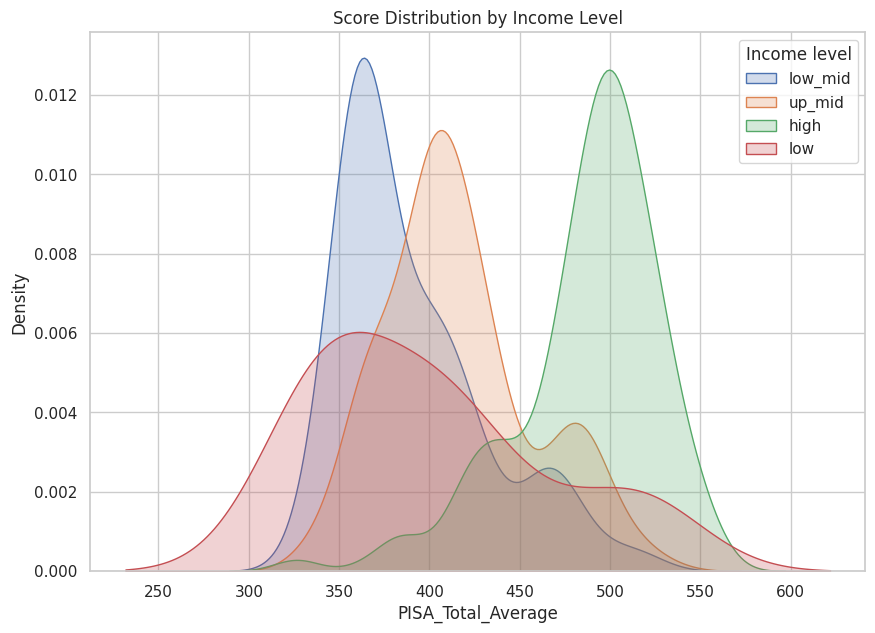

P-value is smaller than 0.05, null hypothesis is rejected. 
At least one of the income groups mean is different than the others.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway

df = pd.read_csv('complete_data.csv') # no NaN values

# extracting 4 different samples based on income level
# updated from recit 5 ANOVA test
low_mid = df[df["classification"] == "Lower-middle-income countries"]["PISA_Total_Average"]
up_mid = df[df["classification"] == "Upper-middle-income countries"]["PISA_Total_Average"]
high = df[df["classification"] == "High-income countries"]["PISA_Total_Average"]
low = df[df["classification"] == "Low-income countries"]["PISA_Total_Average"]


fig, ax = plt.subplots(1,1, figsize=(10,7))

sns.kdeplot(low_mid, fill=True, ax=ax, label="low_mid")
sns.kdeplot(up_mid, fill=True, ax=ax, label="up_mid")
sns.kdeplot(high, fill=True, ax=ax, label="high")
sns.kdeplot(low, fill=True, ax=ax, label="low")

plt.title("Score Distribution by Income Level")
ax.legend(title="Income level") # show the color codes for the graph

plt.show()

f_stat, p_value = stats.f_oneway(low_mid, up_mid, high, low)

if p_value < 0.05:
    print('P-value is smaller than 0.05, null hypothesis is rejected. \nAt least one of the income groups mean is different than the others.')
else:
    print('P-value is bigger than 0.05, fail to reject null hypothesis.\nMeans between different income groups are the same.')


******************************************
**H₀:** The total PISA score mean is identical across all four income groups.  
**H₁:** At least one income group has a different total PISA score mean.

**Method:** ANOVA is used since more than two means are compared.


* Result from ANOVA support the visual difference income groups have in the graph.

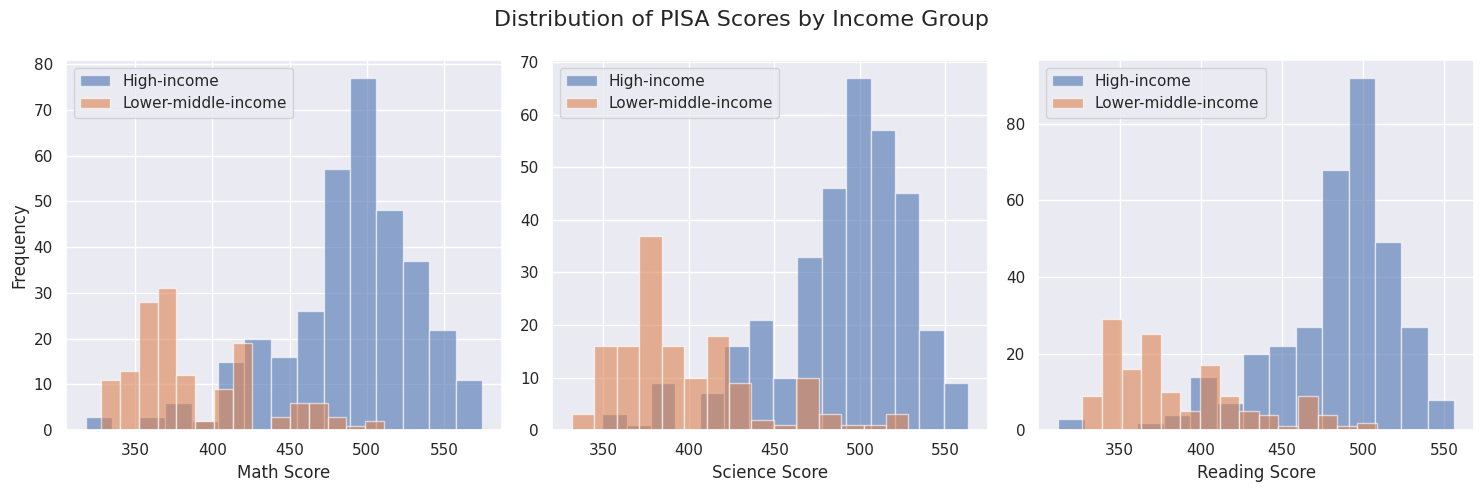

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('complete_data.csv')

high_grp   = 'High-income countries'
lowmid_grp = 'Lower-middle-income countries'

high   = df[df['classification'] == high_grp]
lowmid = df[df['classification'] == lowmid_grp]

math_high   = high['Math_PISA_Total']
math_lowmid = lowmid['Math_PISA_Total']

sci_high    = high['Sci_PISA_Total']
sci_lowmid  = lowmid['Sci_PISA_Total']

read_high   = high['Read_PISA_Total']
read_lowmid = lowmid['Read_PISA_Total']

# 4) Plot histograms side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Math histogram
ax1.hist(math_high,   bins=15, alpha=0.6, label='High-income')
ax1.hist(math_lowmid, bins=15, alpha=0.6, label='Lower-middle-income')
ax1.set_xlabel('Math Score')
ax1.set_ylabel('Frequency')
ax1.legend()

# Science histogram
ax2.hist(sci_high,   bins=15, alpha=0.6, label='High-income')
ax2.hist(sci_lowmid, bins=15, alpha=0.6, label='Lower-middle-income')
ax2.set_xlabel('Science Score')
ax2.legend()

# Reading histogram
ax3.hist(read_high,   bins=15, alpha=0.6, label='High-income')
ax3.hist(read_lowmid, bins=15, alpha=0.6, label='Lower-middle-income')
ax3.set_xlabel('Reading Score')
ax3.legend()

# 5) Layout & show
fig.suptitle('Distribution of PISA Scores by Income Group', fontsize=16)
plt.tight_layout()
plt.show()


* From these graphs there seems to be a significant PISA score difference between high income and low income countries. Also other combinations of income groups will be subject to hypothesis testing to see the relation.

******************************************
**H₀:** The mean total PISA scores for high and lower-middle income countries are the same.  
**H₁:** There is significant difference between the mean total PISA scores for high and lower-middle income countries.

**Method:** Two-tailed independent t test is used.


In [59]:
df['girls_minus_boys_total'] = df['PISA_Girls_Average'] - df['PISA_Boys_Average']

high_income = df[df['classification'] == 'High-income countries']['girls_minus_boys_total'].dropna()
low_middle = df[df['classification'] == 'Lower-middle-income countries']['girls_minus_boys_total'].dropna()


t_stat, p_value = stats.ttest_ind(
    high_income,
    low_middle,
    equal_var=False,
    alternative = 'two-sided'
)

print(f"t-statistic = {t_stat:+.3f}")
print(f"two-tailed p-value = {p_val:.4f}")

# 3) Decision at α = 0.05
alpha = 0.05
if p_value < alpha:
   print('P-value is smaller than 0.05, null hypothesis is rejected. \nThere is significant difference between mean total PISA scores of high and lower-middle income countries.')
else:
    print('P-value is bigger than 0.05, fail to reject null hypothesis.')


t-statistic = -2.090
two-tailed p-value = 0.0376
P-value is smaller than 0.05, null hypothesis is rejected. 
There is significant difference between mean total PISA scores of high and lower-middle income countries.


****
* It is clear that there is a difference after hypothesis testing, now I will check other income groups and see if such a difference will persist.

****

**H₀:** The mean total PISA scores for high income and other income groups are the same.  
**H₁:** There is significant difference between the mean total PISA scores for high income and other income groups.

**Method:** Two-tailed independent t test is used.


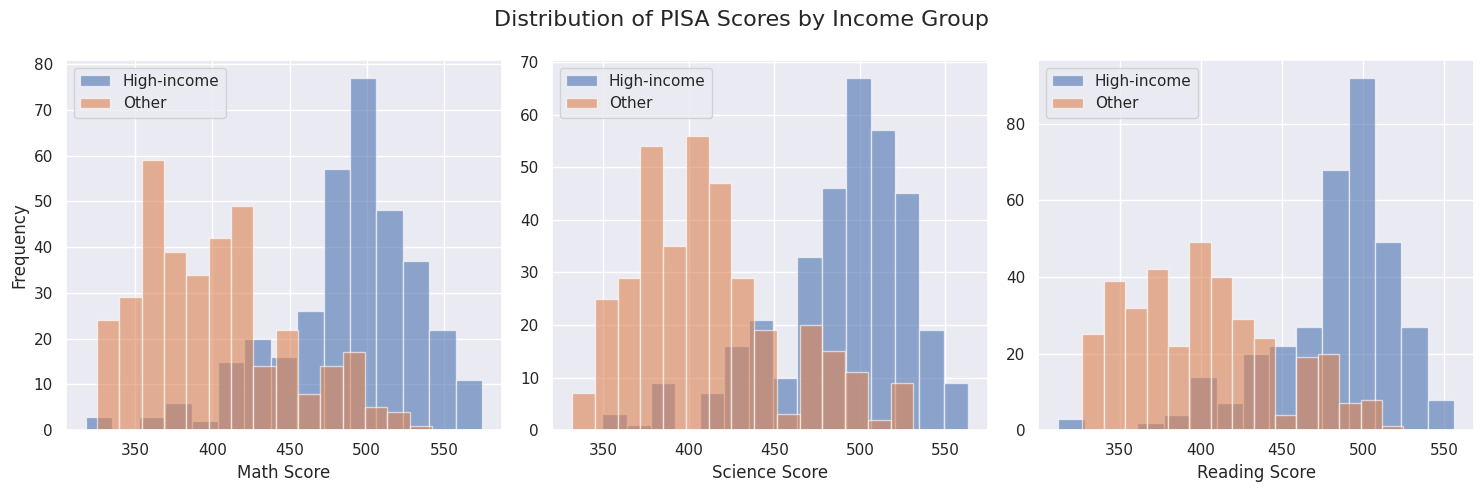

In [65]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('complete_data.csv')

high_grp   = 'High-income countries'
lowmid_grp = ['Lower-middle-income countries', 'Upper-middle-income countries' , 'Low-income countries' ]

high   = df[df['classification'] == high_grp]

lowmid_select = df["classification"].isin([
    "Lower-middle-income countries",
    "Upper-middle-income countries",
    "Low-income countries"
])

lowmid = df.loc[lowmid_select]

math_high   = high['Math_PISA_Total']
math_lowmid = lowmid['Math_PISA_Total']

sci_high    = high['Sci_PISA_Total']
sci_lowmid  = lowmid['Sci_PISA_Total']

read_high   = high['Read_PISA_Total']
read_lowmid = lowmid['Read_PISA_Total']

# 4) Plot histograms side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Math histogram
ax1.hist(math_high,   bins=15, alpha=0.6, label='High-income')
ax1.hist(math_lowmid, bins=15, alpha=0.6, label='Other')
ax1.set_xlabel('Math Score')
ax1.set_ylabel('Frequency')
ax1.legend()

# Science histogram
ax2.hist(sci_high,   bins=15, alpha=0.6, label='High-income')
ax2.hist(sci_lowmid, bins=15, alpha=0.6, label='Other')
ax2.set_xlabel('Science Score')
ax2.legend()

# Reading histogram
ax3.hist(read_high,   bins=15, alpha=0.6, label='High-income')
ax3.hist(read_lowmid, bins=15, alpha=0.6, label='Other')
ax3.set_xlabel('Reading Score')
ax3.legend()

# 5) Layout & show
fig.suptitle('Distribution of PISA Scores by Income Group', fontsize=16)
plt.tight_layout()
plt.show()


In [60]:
df['girls_minus_boys_total'] = df['PISA_Girls_Average'] - df['PISA_Boys_Average']

high_income = df[df['classification'] == 'High-income countries']['girls_minus_boys_total'].dropna()
low_middle = df[df['classification'] != 'High-income countries']['girls_minus_boys_total'].dropna()


t_stat, p_val = stats.ttest_ind(
    high_income,
    low_middle,
    equal_var=False     # Welch correction
)                       # default alternative = 'two-sided'

print(f"Welch t-statistic = {t_stat:+.3f}")
print(f"two-tailed p-value = {p_val:.4f}")

# 3) Decision at α = 0.05
alpha = 0.05
if p_val < alpha:
   print('P-value is smaller than 0.05, null hypothesis is rejected. \nThere is significant difference between mean total PISA scores of high and other income groups.')
else:
    print('P-value is bigger than 0.05, fail to reject null hypothesis.\nThere is not a significant difference between mean total PISA scores of high and other income groups.')


Welch t-statistic = -1.011
two-tailed p-value = 0.3125
P-value is bigger than 0.05, fail to reject null hypothesis.
There is not a significant difference between mean total PISA scores of high and other income groups.


* When grouped into high income vs others, there is not a difference between mean PISA scores, but that difference comes up when High income and low income are compared.

***

<ipython-input-49-4fc2e9dd938b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="World_Region", y="PISA_Total_Average", data=df, palette = region_colors)


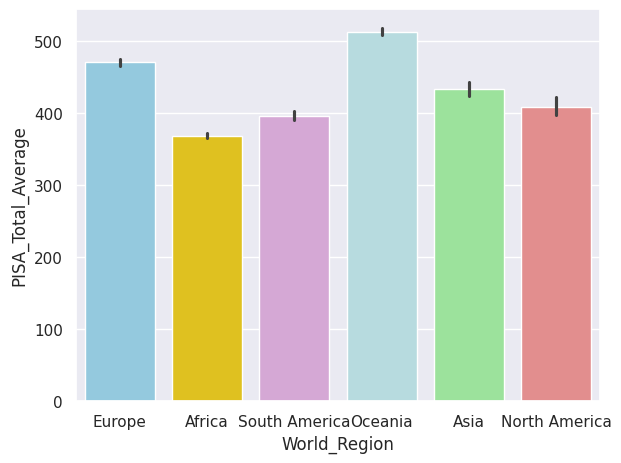

In [ ]:
sns.set_style("darkgrid")


region_colors = {
    'Europe':    'skyblue',
    'Asia': 'lightgreen',
    'South America': 'plum',
    'Africa':   'gold',
    'North America': 'lightcoral',
    'Oceania': 'powderblue'
}

sns.barplot(x="World_Region", y="PISA_Total_Average", data=df, palette = region_colors)
plt.tight_layout()
plt.show()

* This graph shows mean total PISA score for different world regions.

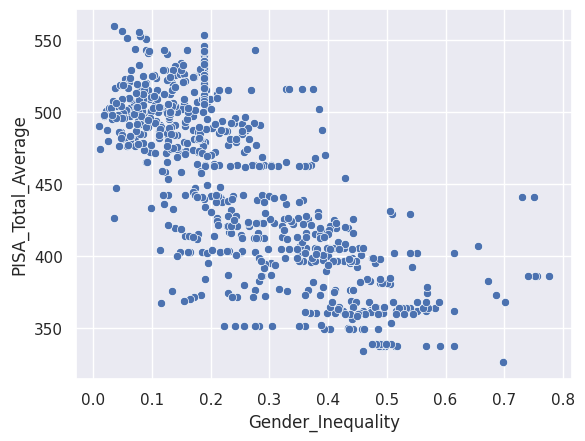

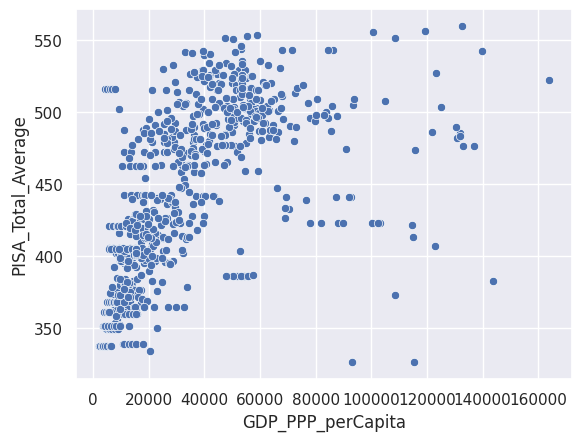

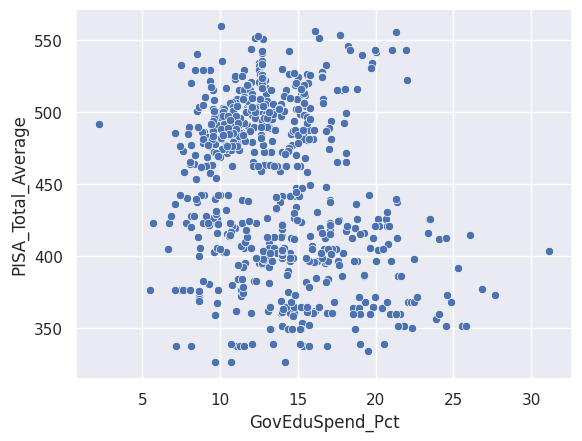

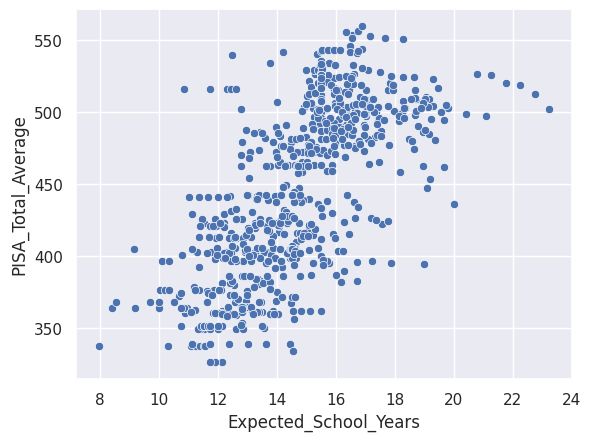

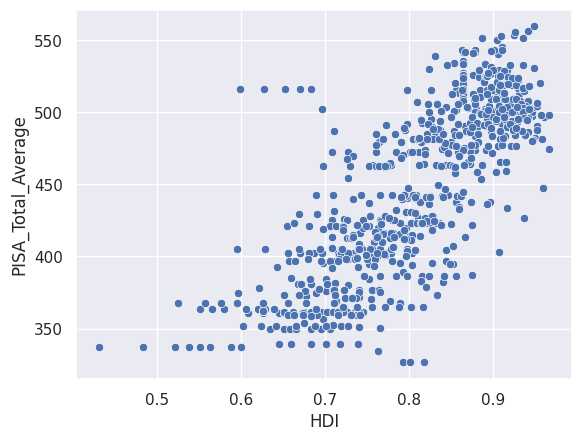

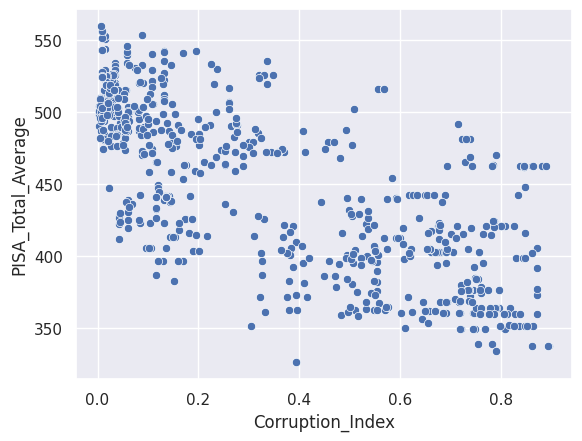

In [67]:
sns.scatterplot(x="Gender_Inequality", y="PISA_Total_Average", data=df)
plt.show()
sns.scatterplot(x="GDP_PPP_perCapita", y="PISA_Total_Average", data=df)
plt.show()
sns.scatterplot(x="GovEduSpend_Pct", y="PISA_Total_Average", data=df)
plt.show()
sns.scatterplot(x="Expected_School_Years", y="PISA_Total_Average", data=df)
plt.show()
sns.scatterplot(x="HDI", y="PISA_Total_Average", data=df)
plt.show()
sns.scatterplot(x="Corruption_Index", y="PISA_Total_Average", data=df)
plt.show()


* From these graphs, goverment education spending does not seem to affect mean total PISA scores.

* Other factors have some correlation with the PISA scores.

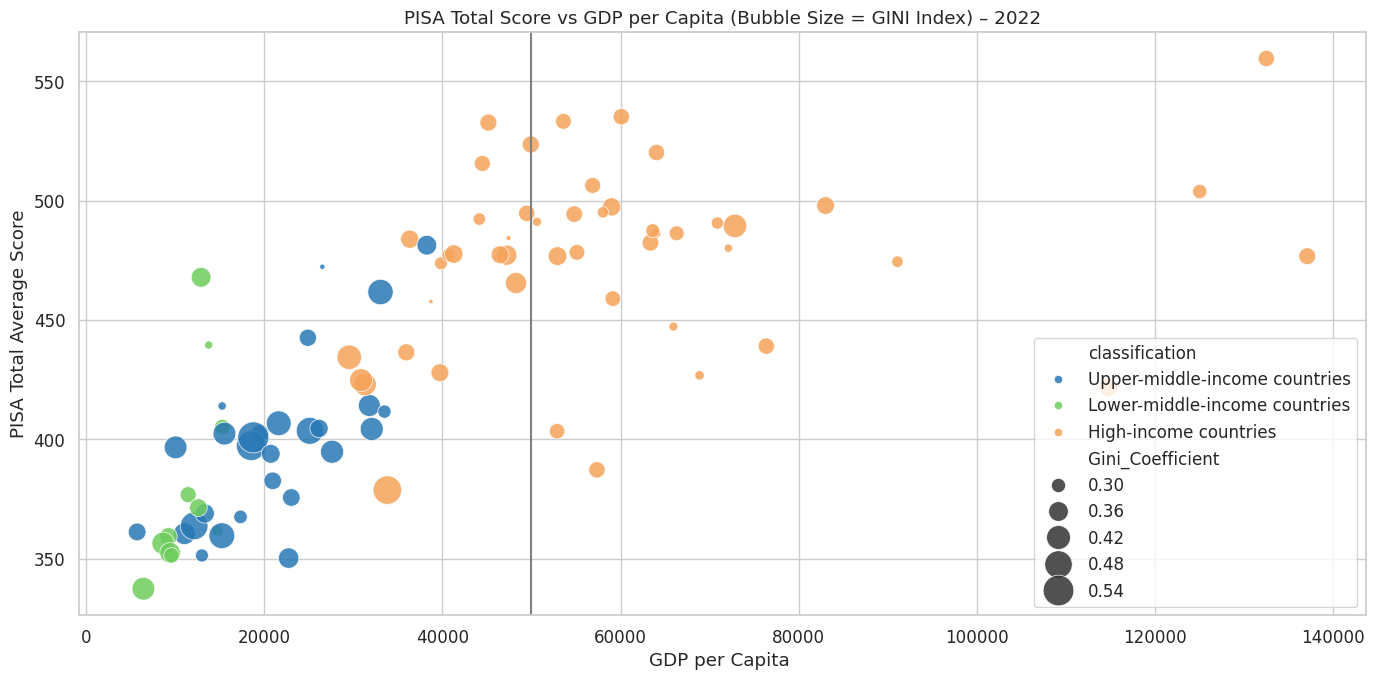

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("complete_data.csv")
df_2022 = df[df["Year"] == 2022].copy()

sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(14, 7))

palette = {
    "High-income countries":         "#F4A259",
    "Upper-middle-income countries": "#2878B5",
    "Lower-middle-income countries": "#6ECC5D",
    "Low-income countries":          "#9E9E9E"
}

ax = sns.scatterplot(
    data=df_2022,
    x="GDP_PPP_perCapita", y="PISA_Total_Average",
    hue="classification", palette=palette,
    size="Gini_Coefficient", sizes=(10, 500),   # min max bubble size
    alpha=0.85
)


ax.set_title("PISA Total Score vs GDP per Capita (Bubble Size = GINI Index) – 2022")
ax.set_xlabel("GDP per Capita ")
ax.set_ylabel("PISA Total Average Score")

ax.axvline(50000, color="gray") # horizontal line to highlight GDP

plt.tight_layout()
plt.show()
